<a href="https://colab.research.google.com/github/hookskl/nlp_w_pytorch/blob/main/nlp_w_pytorch_ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feed-Forward Networks for Natural Language Processing

The need for more complex architectures comes from the perceptron being unable to learn nontrivial patterns, i.e. patterns that are not *linearly separable*.

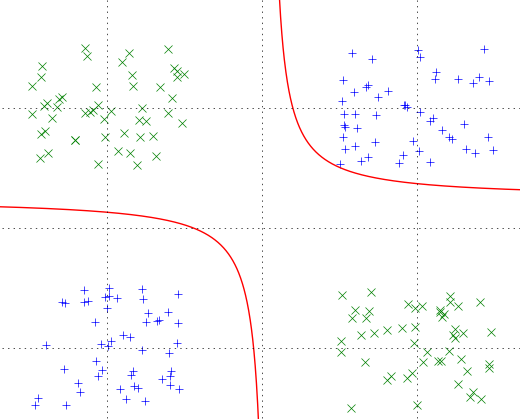

A family of neural networks called *feed-forward networks* are much more adept at learning these patterns. Two of these networks are:

*   multilayer perceptron (MLP)
*   convolutional neural network (CNN)

The MLP extends the perceptron by grouping multiple perceptrons together in a single layer and stacking multiple layers together.

CNNs are inspired by window filters used in signal processing. The use of window filters allows CNNs to learn localized patterns in their inputs. This has lead to them being a standard choice for computer vision tasks, as well as being capable of detecting substructures in sequential data (i.e. words and sentences). 


## The Multilayer Perceptron

MLPs group multiple perceptrons in a single layer, where the output is a vector instead of a single value. An additional aspect of the MLP is between each layer is a nonlinearity (such as the ReLU).

The simplest MLP is composed of three stages of representations and two `Linear` layers. The structure goes as follows:

* input vector (representation) - this is the vector given to the model, such as the one-hot representation of the Yelp reviews
* first `Linear` layer
* hidden vector (representation) - computed by the first `Linear` layer using the input vector
* second `Linear` layer
* output vector (representation) - computed by the second `Linear` layer using the hidden vector

The power of the MLP comes from the additional `Linear` layer, allowing the model to learn intermediate representations that are *linearly separable*.



### A Simple Example: XOR

### Implementing MLP's in PyTorch

*Example 4-1. Multilayer perceptron using PyTorch*



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

seed = 1337
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [2]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Args:
            input_dim (int): the size of the input vectors
            hidden_dim (int): the output size of the first Linear layer
            output_dim (int): the output size of the second Linear layer
        """
        super(MultilayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the MLP
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, input_dim)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. 
                tensor.shape should be (batch, output_dim)
        """
        intermediate = F.relu(self.fc1(x_in))
        output = self.fc2(intermediate)
        
        if apply_softmax:
            output = F.softmax(output, dim=1)
        return output

*Example 4-2. An example instantiation of an MLP*


In [3]:
batch_size = 2 # number of samples input at once
input_dim = 3
hidden_dim = 100
output_dim = 4

# Instantiate model
mlp = MultilayerPerceptron(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
print(mlp)

MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)


*Example 4-3. Testing the MLP with random inputs*


In [4]:
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("values: \n{}".format(x))

x_input = torch.rand(batch_size, input_dim)
describe(x_input)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
values: 
tensor([[0.8329, 0.4277, 0.4363],
        [0.9686, 0.6316, 0.8494]])


*Example 4-4. Producing probabilistic outputs with a multilayer perceptron classifier (notice the `apply_softmax = True` option*


In [5]:
y_output = mlp(x_input, apply_softmax=True)
describe(y_output)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 4])
values: 
tensor([[0.2087, 0.2868, 0.3127, 0.1919],
        [0.1832, 0.2824, 0.3649, 0.1696]], grad_fn=<SoftmaxBackward>)


## Example: Surname Classification with an MLP

### The Surnames Dataset

*Example 4-5. Implementing `SurnameDataset.__getitem__()`*

```
```

### Vocabulary, Vectorizer, and DataLoader

#### The Vocabulary class

#### The SurnameVectorizer

*Example 4-6. Implementing `SurnameVectorizer`*

```
```

### The SurnameClassifier Model

*Example 4-7. The `SurnameClassifier` using an MLP*

```
```

### The Training Routine

*Example 4-8. Hyperparameters and program options for the MLP-based Yelp review classifier*

```
```

*Example 4-9. Instantiating the dataset, model, loss, and optimizer*

```
```

#### The training loop

*Example 4-10. A snippet of the training loop*

```
```

### Model Evaluation and Prediction

#### Evaluating on the test dataset

#### Classifying a new surname

*Example 4-11. Inference using an existing model (classifier): Predicting the nationaility given a name*

```
```

#### Retrieving the top k predictions for a new surname

*Example 4-12. Predicting the top-k nationalities*

```
```

## Regularizing MLPs: Weight Regularization and Structural Regularization (or Dropout)

*Example 4-13. MLP with dropout*

```
```

## Convolutional Neural Networks

### CNN Hyperparameters

#### Dimension of the convolution operation

#### Channels

#### Kernel size

#### Stride

#### Padding

#### Dialation

### Implementing CNNs in PyTorch

*Example 4-14. Artificial data and using a `Conv1d` class*


*Example 4-15. The iterative application of convolutions to data*

*Example 4-16*

## Example: Classifying Surnames by Using a CNN

### The SurnameDataset Class

*Example 4-17. `SurnameDataset` modified for passing the maximum surname length*

```
```

### Vocabulary, Vectorizer, and DataLoader

*Example 4-18. Implementing the `SurnameVectorizer` for CNNs*

```
```

### Reimplementing the SurnameClassifier with Convolutional Networks

*Example 4-19. The CNN-based `SurnameClassifier`*

```
```

### The Training Routine

*Example 4-20. Input arguments to the CNN surname classifier*

```
```

### Model Evaluation and Prediction

#### Evaluating on the test dataset

#### Classifying or retrieving top predictions for a new surname

*Example 4-21. Using the trained model to make predictions*

```
```

## Miscellaneous Topics in CNNs

### Pooling

### Batch Normalization (BatchNorm)

*Example 4-22. Using a Conv1D layer with batch normalization*

```
```

### Network-in-Network Connections (1x1 Convolutions)

### Residual Connections/Residual Block